In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [64]:
df = pd.read_csv("homeprices_banglore.csv")

In [65]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

In [90]:
scaled_x =  sx.fit_transform(df.drop("price", axis="columns"))
scaled_y = sy.fit_transform(df["price"].values.reshape(-1,1)).ravel()

In [91]:
import random
random_index = random.randint(0,scaled_x.shape[0])
sample_x = scaled_x[0]
sample_x,random_index

(array([0.08827586, 0.25      ]), 19)

In [92]:
def stocastic_gradient_descent(X, y, learning_rate, epochs):
    number_of_features = X.shape[1]
    w =  np.ones(shape=number_of_features)
    bias = 0
    total_samples = X.shape[0]
    cost_list = []
    epochs_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y[random_index]

        y_predict = np.dot(w,sample_x.T)+bias
        w_sgd = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predict))
        bias_sgd = -(2/total_samples)*np.sum(sample_y-y_predict)

        w = w - learning_rate*w_sgd
        bias = bias -learning_rate*bias_sgd
        cost = np.mean(np.square(sample_y-y_predict))

        # if i%50 == 0:
        #     print(f' w:{w}, bias:{bias}, cost:{cost}')

        cost_list.append(cost)
        epochs_list.append(i)
    return w, bias, cost, cost_list, epochs_list

In [104]:
# stocastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],), 0.01, 500)
w, bias, cost, cost_list, epochs_list = stocastic_gradient_descent(scaled_x,scaled_y, 0.01, 500)

In [105]:
def predict(area, bedroom, w, bias):
    X_scaled = sx.transform([[area,bedroom]])
    scaled_price =np.dot(w,X_scaled[0])+bias
    return sy.inverse_transform([[scaled_price]])[0][0]
    

In [106]:
predict(2600,4, w, bias)

C:\Users\niraj.meshram\AppData\Local\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(177.98864769756327)

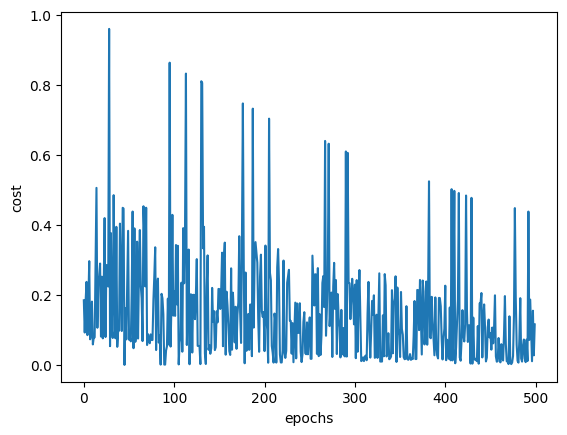

In [108]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epochs_list,cost_list)